In [2]:
from fastai2.vision.all import *

In [3]:
dblock = DataBlock(get_x = lambda r: f"data/jpeg/train{r['image_name']}",
                  get_y = lambda r : r["target"],)

In [4]:
train_df = pd.read_csv('data/train.csv')

In [6]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=RandomSplitter(0.3,42),
                   get_x = lambda r: f"data/jpeg/train/{r['image_name']}.jpg",
                   get_y = lambda r : str(r["target"]),
                   item_tfms = Resize(size=224))

In [7]:
dls = dblock.dataloaders(train_df)

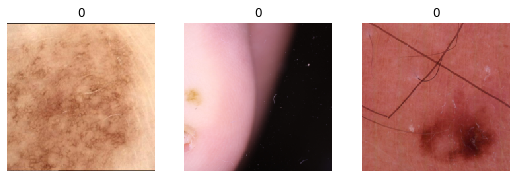

In [8]:
dls.show_batch(nrows=1, ncols=3)

In [9]:
learn = cnn_learner(dls, resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/ec2-user/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [ ]:
learn.fit_one_cycle(n_epoch=6, lr=3e-3)

epoch,train_loss,valid_loss,time
